# <font color=red>Car Sales EDA</font>                                          

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Data source and data set](#section101)<br/>
- 2. [Load the packages and data[Data source and data set]](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [Pandas profiling](#section303)<br/>
    - 3.4 [Initial observations](#section304)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Drop Registration Column](#section401)<br/>
    - 4.2 [Missing Data and its imputation](#section402)<br/>
    - 4.3 [Handling NaN values in drive column](#section403)<br/>
    - 4.4 [Handling null values of price column](#section404)<br/>
    - 4.5 [Correlation of Features](#section405)<br/>           
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Understanding column: Year](#section501)<br/>
    - 5.2 [Understanding column: Mileage](#section502)<br/>
    - 5.3 [Understanding column: engV](#section503)<br/>
    - 5.4 [Understanding column: Body](#section505)<br/>
    - 5.5 [Understanding column: engType](#section506)<br/>
    - 5.6 [Understanding column: Drive](#section507)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [Among top 3 car, which car sale is consistently low for 10 years?](#section601)<br/>
     - 6.2[which engine type is sold less in BMW car among petrol and diesel?](#section602)<br/>
     - 6.3[Which car body type is sold most in last 10 years?](#section603)<br/>
     - 6.4 [Which drive type is sold most among all car body type?](#section604)<br/>
     - 6.5 [which engine type is sold most among all the car body type?](#section605)<br/>
     - 6.6 [which price range car are mostly sold?](#section606)<br/>
     - 6.7 [Which model with engine type is mostly preferred?](#section607)<br/>
     - 6.8 [Which model with drive type is mostly preferred?](#section608)<br/>
- 7. [Conclusion](#section7)<br/>
- 8. [Actionable Insight](#section8)<br/>

<a id=section1></a> 
## <font color=blue>1.Problem Statement</font>

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis 
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
Finding patterns in Data
Determining relationships in Data
Checking of assumptions
Preliminary selection of appropriate models
Detection of mistakes

<a id=section101></a>
### <font color=blue>1.1 Data source and data set</font>

### Car Sales data describes sales statistics of car along with its details from year 1959-2016.Below are the fields on which car analysis is done.

- **car**         --> Brand Name of car	       
- **price**      --> Sell price of a car.
- **body**       --> Type of the material of which car made up of  
- **mileage**   --> Number of miles car has travelled (For new car mileage=0)   
- **engV**      --> Range of engine   
- **engType**  --> Type of engine in car   
- **year**     --> Manufacture year of car   
- **model**      --> Model Name of car   
- **drive**--> Car's driven wheel type
- **registration**--> Car is registered or not


<a id=section2></a>
## <font color=blue>2 Load Packages and data</font>

In [7]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              


import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
# Read data from csv
import pandas as pd
car_sales_df=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='latin 1')

#print(car_sales_df.count())

<a id=section3></a>
## <font color=blue>3.Data Profiling </font>

<a id=section301></a>

### Understanding types and sample of data

In [8]:
car_sales_df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section302></a>

In [9]:
car_sales_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


#### **Observations** <br>
-  Summary of data types in car_sales_df dataset:<br>
-  Price and engV field contains float value.Year is numeric field.<br>
-  All other fields are object.<br>
-  price field contains zero value which seems to be incorrect.<br>
-  drive, engV field contains missing value.

<a id=section303></a>
### <font color=blue>3.3 Pandas profiling </font>

In [10]:
preprofile = pandas_profiling.ProfileReport(car_sales_df)
preprofile.to_file(outputfile="car_data_df_before_processing.html")

<a id=section304></a>
## <font color=blue>3.4 Initial observations</font>

- Summary of data types in car_sales_df dataset:<br>
 Float : price, engV<br>
 Numeric: year<br>
 object: everything else<br>
 
- car column has 84 distinct brands of car which are further categorized into its model.
-  price column contains 267 zero value that may need to be addressed.
-  Maximum number of value in mileage filed is zero,Assuming mileage is number of miles travelled.Hence,mileage=0 is considered    as New car.
-  Registration column contains yes/no value.It is not much required field so can be dropped.
-  drive column contains 4 distinct values.
-  engv,drive field contains missing values which may need to be addressed.

<a id=section4></a>
## <font color=blue>4 Data Normalization</font>

<a id=section401></a>
### <font color=blue>4.1 Drop Registration Column</font>


In [11]:
car_sales_df['registration'].value_counts()

yes    9015
no      561
Name: registration, dtype: int64

In [12]:
car_sales_df=car_sales_df.drop(['registration'], axis= 1)


In [13]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 9 columns):
car        9576 non-null object
price      9576 non-null float64
body       9576 non-null object
mileage    9576 non-null int64
engV       9142 non-null float64
engType    9576 non-null object
year       9576 non-null int64
model      9576 non-null object
drive      9065 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 673.4+ KB


<a id=section402></a>
### <font color=blue>4.2 Missing Data and its imputation</font>

In [14]:
car_sales_df['engV']=car_sales_df.engV.fillna(car_sales_df.groupby('car')['engV'].transform('median'))

In [15]:
car_sales_df[car_sales_df['engV'].isnull()]

,car,price,body,mileage,engV,engType,year,model,drive
8824,Fisker,0.0,other,100,NaN,Other,2001,Karma,NaN
8905,Changan,6028.0,crossover,101,NaN,Other,2005,Ideal,NaN
9360,Barkas,5500.0,van,80,NaN,Petrol,2015,B1000,NaN


In [16]:
car_sales_df=car_sales_df.drop(car_sales_df[car_sales_df['engV'].isnull()].index,axis=0)

#### Observations for engV<br>
-  After replacing null engV values with median values, still 3 rows with null has been identified.<br>
-  Median value for these 3 cars are 0 because quantity is only one each so dropping these 3 rows.<br>
-  Deleted these 3 rows.

<a id=section403></a>
### <font color=blue>4.3 Handling NaN values in drive column</font>

In [17]:
car_sales_df['drive'].fillna(car_sales_df['drive'].mode()[0], inplace=True)

#### Observations for drive<br>
-  Replaced drive nan values with its mode value i.e. __front__

<a id=section404></a>
### <font color=blue>4.4 Handling null values of price column</font>

In [18]:
car_sales_df['price'].replace(0,np.nan,inplace=True)

#### created a new column __new_price__ with median on the basis of model

In [19]:
car_sales_df['new_price']=car_sales_df.groupby(['model'])['price'].transform('median')

#### Replacing NAN in Price Column with its corresponding values in New_Price column

In [20]:
car_sales_df['price'].replace(np.nan,car_sales_df['new_price'],inplace=True)

In [21]:
car_sales_df[car_sales_df['price'].isnull()]

,car,price,body,mileage,engV,engType,year,model,drive,new_price
3280,Hyundai,NaN,sedan,27,5.00,Petrol,2013,Genesis,rear,NaN
3335,ËUAZ,NaN,other,10,1.50,Petrol,1991,969 Âîëûíü,full,NaN
4038,GAZ,NaN,other,1,2.46,Other,1958,69,front,NaN
5084,GAZ,NaN,crossover,1,2.46,Petrol,1963,69,full,NaN
6248,GMC,NaN,crossover,130,4.30,Petrol,1998,Safari,full,NaN
7220,VAZ,NaN,hatch,1,1.50,Gas,1998,2109 (Áàëòèêà),front,NaN
7848,Mercedes-Benz,NaN,van,273,2.90,Diesel,2001,Sprinter 310 ïàññ.,front,NaN
8772,BMW,NaN,sedan,99,4.40,Petrol,2013,Alpina,full,NaN


#### Dropping 8 rows where price of a model is zero and record is only one for a model

In [22]:
car_sales_df=car_sales_df.drop(car_sales_df[car_sales_df['new_price'].isnull()].index,axis=0)


In [23]:
car_sales_df=car_sales_df.drop(['new_price'],axis=1)


#### Observations for price<br>
-  Replaced zero value with nan and then replaced it with median value after grouping it with car model
-  Median value for 8 cars are 0 dropped it<br>

<a id=section405></a>
## <font color=blue>4.5 Correlation of Features</font> 

In [24]:
car_sales_df.corr()

,price,mileage,engV,year
price,1.000000,-0.338855,0.053650,0.391977
mileage,-0.338855,1.000000,0.047945,-0.500563
engV,0.053650,0.047945,1.000000,-0.041610
year,0.391977,-0.500563,-0.041610,1.000000


#### Observation
-  Price and Year are positively correlated , Price and Mileage are negatively correlated

<a id=section5></a>
## <font color=blue>5. Identify pattern in the data</font>

<a id=section501></a>
### <font color=blue>5.1 Understanding column: Year</font>

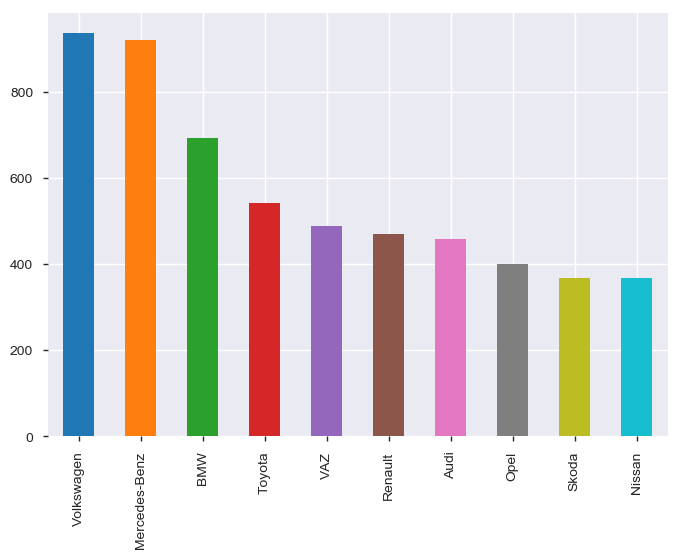

In [25]:
car_sales_df['car'].value_counts().head(10).plot.bar()

#### Observations
-  Above plot describes volkswagen,Mercede-Benz and BMW are the most sellable cars.<br>

In [26]:
car_sales_df[(car_sales_df['year'] >= 2012)]['year'].value_counts().sort_index()

2012    767
2013    649
2014    368
2015    248
2016    459
Name: year, dtype: int64

In [27]:
car_sales_df[(car_sales_df['year'] < 2012) & (car_sales_df['year'] > 2006)]['year'].value_counts().sort_index()

2007     930
2008    1158
2009     347
2010     389
2011     701
Name: year, dtype: int64

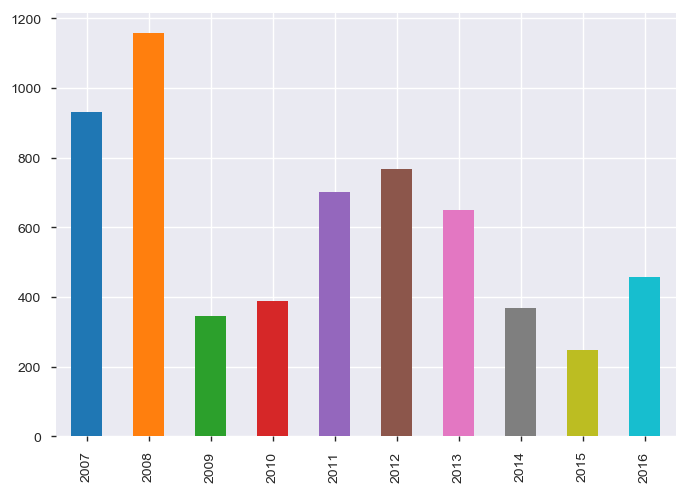

In [28]:
car_sales_df[(car_sales_df['year'] < 2018) & (car_sales_df['year'] > 2006)]['year'].value_counts().sort_index().plot.bar()

-  Above plot is for a year range 2007 to 2016.
-  Car sale is increased from 2009 to 2012 and then decreased from 2012 to 2015.

<a id=section502></a>
### <font color=blue>5.2 Understanding column: Mileage</font>

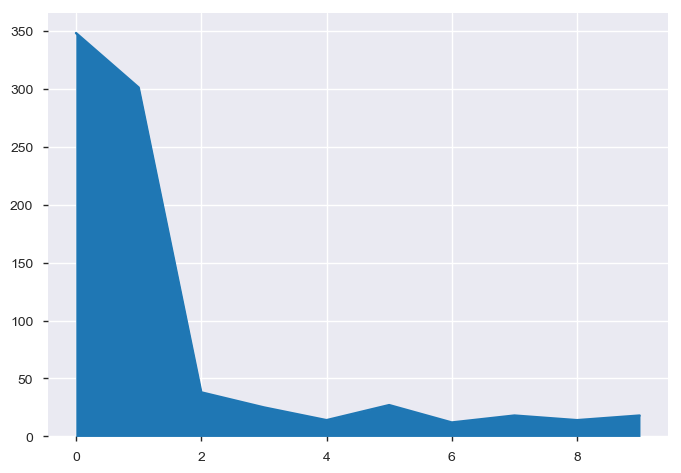

In [29]:
car_sales_df[(car_sales_df['mileage'] < 10)]['mileage'].value_counts().sort_index().plot.area()

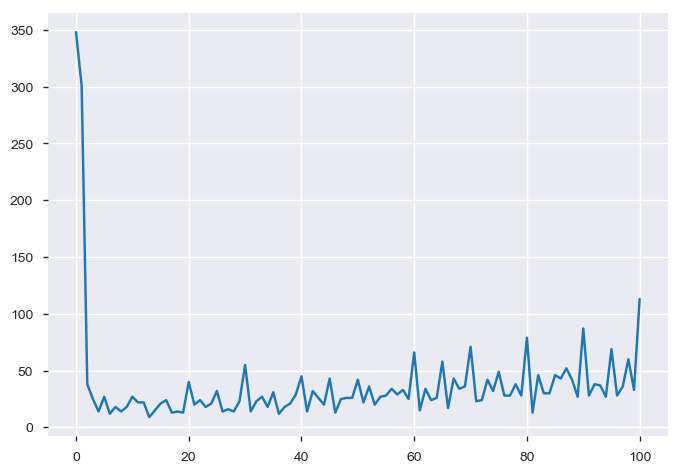

In [30]:
car_sales_df[(car_sales_df['mileage'] >= 0)& (car_sales_df['mileage'] <= 100)]['mileage'].value_counts().sort_index().plot.line()

-  Above plot shows Mileage which range from 0 to 100

<a id=section503></a>
### <font color=blue>5.3 Understanding column: engV</font>

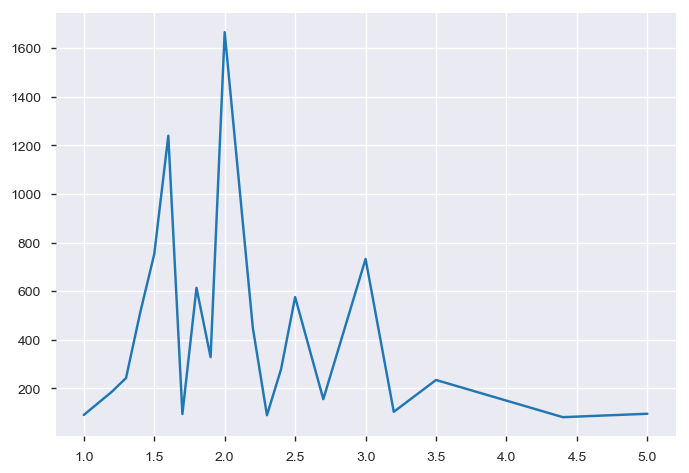

In [31]:
car_sales_df[(car_sales_df['engV'] <= 100)]['engV'].value_counts().head(20).sort_index().plot.line()

<a id=section504></a>
### <font color=blue>5.4 Understanding column: body</font>


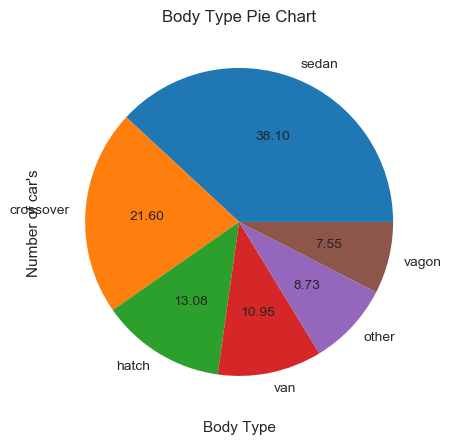

In [32]:
car_sales_df['body'].value_counts().plot.pie(figsize=(5, 5), autopct='%.2f')
plt.title("Body Type Pie Chart")
plt.ylabel("Number of car's")
plt.xlabel('Body Type');

#### Observations:
-  most sold body type is __Sedan__ and __Crossover__
-  Hatch, Van and Vagon each share is less than 14%

<a id=section505></a>
### <font color=blue>5.5 Understanding column: engType</font>


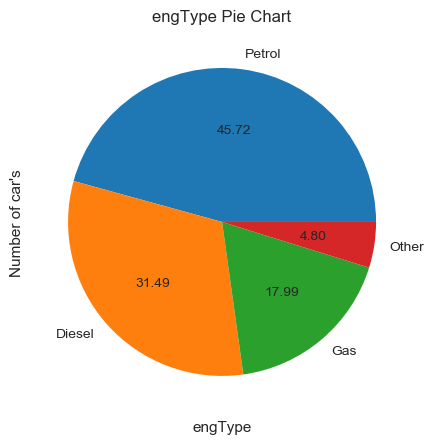

In [33]:
car_sales_df['engType'].value_counts().plot.pie(figsize=(5, 5), autopct='%.2f')
plt.title("engType Pie Chart")
plt.ylabel("Number of car's")
plt.xlabel('engType');

<a id=section506></a>
### <font color=blue>5.6 Understanding column: drive</font>


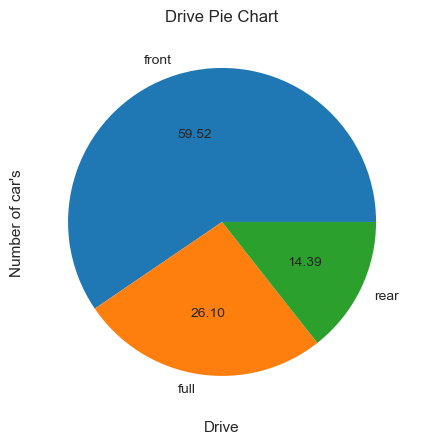

In [34]:
car_sales_df['drive'].value_counts().plot.pie(figsize=(5, 5), autopct='%.2f')
plt.title("Drive Pie Chart")
plt.ylabel("Number of car's")
plt.xlabel('Drive');

-  front drive is preferred by all the customer 

### Observation of all columns
-  Above plot describes __volkswagen__,__Mercede-Benz__ and __BMW__ are the most sellable cars.
-  Most less sellabe cars are Samsung,Lambhorgini,Mercury,SMA,etc.
-  Car sale is increased from 2009 to 2012 and then decreased from 2012 to 2015.
-  engV value ranges from 0 to 100
-  most sold body type is __Sedan__ and __Crossover__
-  Hatch, Van and Vagon share is less than 14% each
-  front drive is preferred by all the customer.

<a id=section6></a>
## <font color=blue>6. Analysis through questions</font>

<a id=section601></a>
### <font color=blue>Q1  Among top 3 car, which car sale is consistently low for 10 years?</font>

In [35]:
car_list=['Volkswagen','BMW','Mercedes-Benz']
car_sales_df[car_sales_df['car'].isin(car_list)].groupby('body').count()

,car,price,mileage,engV,engType,year,model,drive
body,,,,,,,,
crossover,445,445,445,445,445,445,445,445
hatch,147,147,147,147,147,147,147,147
other,300,300,300,300,300,300,300,300
sedan,1042,1042,1042,1042,1042,1042,1042,1042
vagon,161,161,161,161,161,161,161,161
van,454,454,454,454,454,454,454,454


#### <font color=blue> Creating new data set car_data_10Yr by flitering out data from 2006-2018</font>

In [36]:
car_data_10Yr=car_sales_df[(car_sales_df['year'] < 2018) & (car_sales_df['year'] > 2006)]


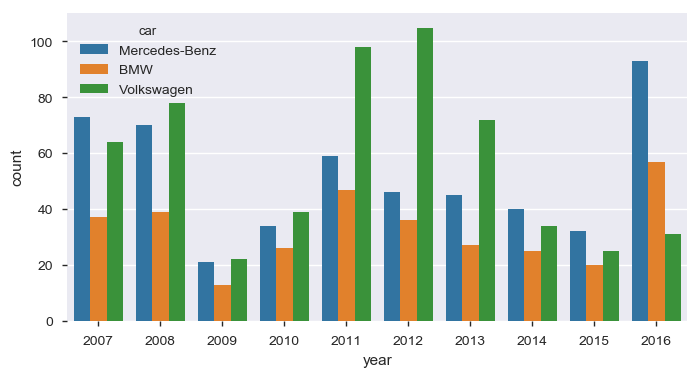

In [37]:
plt.figure(figsize=(8,4))
sns.countplot("year", hue="car", data=car_data_10Yr[car_data_10Yr['car'].isin(['BMW','Volkswagen','Mercedes-Benz'])])

### observation
-  From 2007-2013, sales of volkswagen was highest and Mercedes-Benz was second highest.<br>
-  After 2013, sales of Mercedes-Benz was highest and Volkswagen was second highest.
-  Sales of BMW was consistently low till 2015

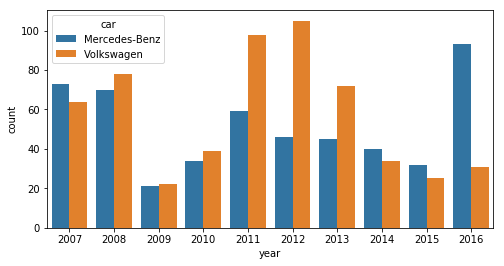

In [110]:
plt.figure(figsize=(8,4))
sns.countplot("year", hue="car", data=car_data_10Yr[car_data_10Yr['car'].isin(['Volkswagen','Mercedes-Benz'])])

#### Observation
-  sales of volkswagen is more than Mercedes-Benz from 2007 to 2013 but in 2014 sale of Mercedes-Benz is more than volkswagen
-  sale of Mercedes-Benz is increased drastically in 2016

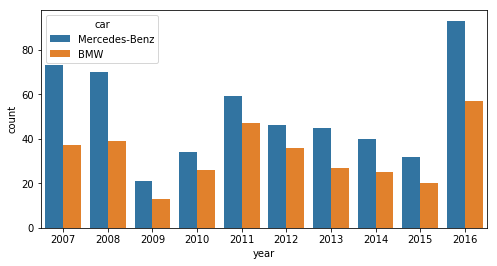

In [111]:
plt.figure(figsize=(8,4))
sns.countplot("year", hue="car", data=car_data_10Yr[car_data_10Yr['car'].isin(['BMW','Mercedes-Benz'])])

-  Above plot shows sale of BMW is always less than Mercedes-Benz

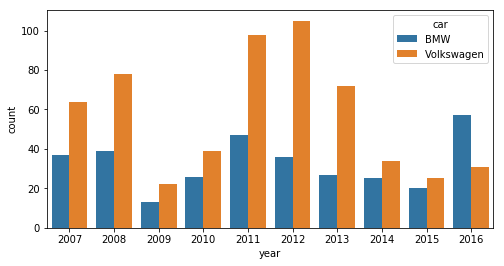

In [112]:
plt.figure(figsize=(8,4))
sns.countplot("year", hue="car", data=car_data_10Yr[car_data_10Yr['car'].isin(['BMW','Volkswagen'])])

-  Above plot shows sale of Volkswagen is always greater than BMW but in year 2016 BMW over take volkswagen i.e. sale of BMW increased in 2016

<a id=section602></a>
### <font color=blue> Q2 which engine type is sold less in BMW car among petrol and diesel?

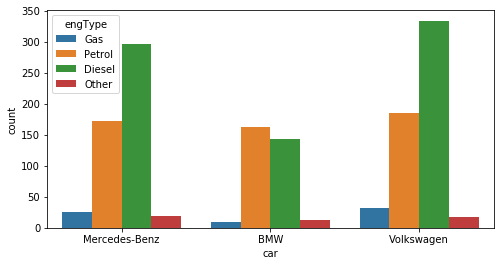

In [113]:
plt.figure(figsize=(8,4))
sns.countplot("car", hue="engType", data=car_data_10Yr[car_data_10Yr['car'].isin(['BMW','Volkswagen','Mercedes-Benz'])])

Above plot shows -
-  diesel car of Volkswagen and Mercedes-Benz is sold more compared to petrol car
-  petrol car of BMW is sold more compared to diesel

<a id=section603></a>
### <font color=blue> Q3 Which car body type is sold most in last 10 years?

In [40]:
top_car_data=car_data_10Yr[car_data_10Yr['car'].isin(['BMW','Mercedes-Benz','Volkswagen'])]

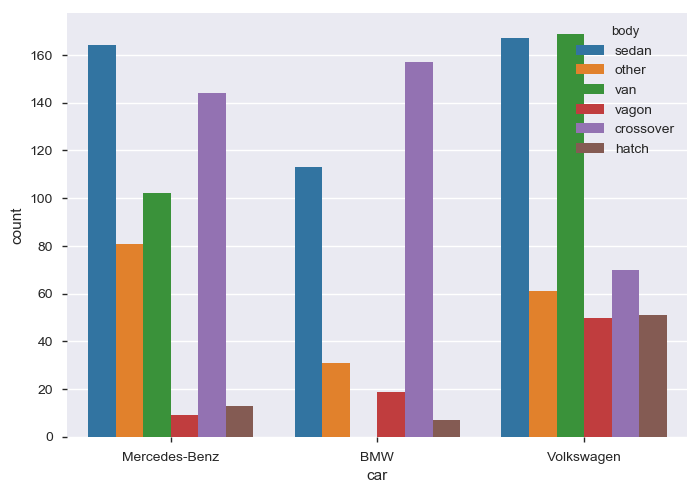

In [41]:
sns.countplot(x='car',data=top_car_data,hue='body')

Above plot inferred-
-  sedan and crossover body car is mostly preferred.
-  In BMW, crossover body is preferred as compared to sedan body.

<a id=section604></a>
### <font color=blue> Q4 Which drive type is sold most among all car body type?

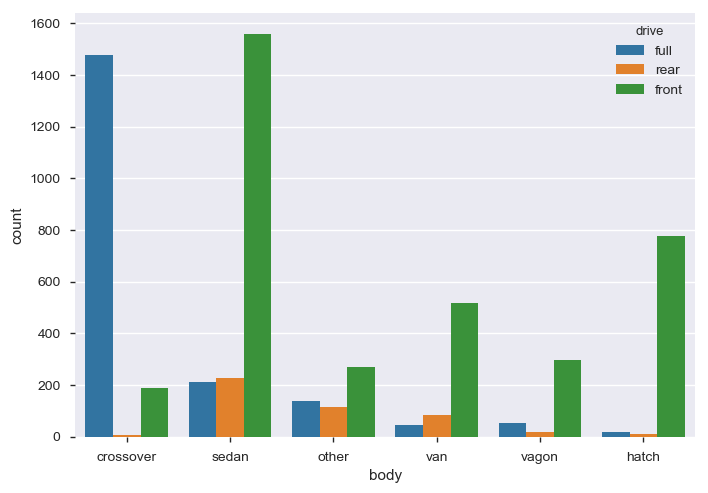

In [42]:
sns.countplot(x='body',data=car_data_10Yr,hue='drive')

Above plot shows -
-  front wheel drive are the top most sold in all the body type except crossover.
-  In Crossover, full wheel drive is top most sold

<a id=section605></a>
### <font color=blue> Q5 which engine type is sold most among all the car body type?

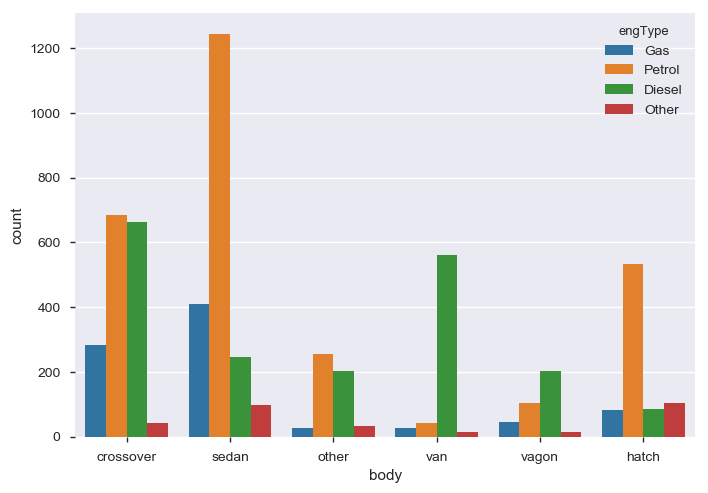

In [43]:
sns.countplot(x='body',data=car_data_10Yr,hue='engType')

Above plot shows -
-  In sedan, petrol car is the top most sold among all body type
-  In crossover, both petrol and desiel car are sold approximately equal

<a id=section606></a>
### <font color=blue> Q6 which price range car are mostly sold?

In [44]:
car_data_10Yr['price_group'] = pd.cut(car_data_10Yr['price'],
                         [0,20000,30000,50000,100000,600000],
                         labels=['<20k','20k-30k','30k-50k','50k-100k','>100k'], include_lowest=True)
car_data_10Yr['price_group'].value_counts()

<20k        4140
20k-30k      752
30k-50k      578
50k-100k     389
>100k        157
Name: price_group, dtype: int64

-  car's sold are mostly of price less than 20k

In [45]:
df4=car_data_10Yr[car_data_10Yr['price_group']=='<20k']

In [46]:
df4['body'].value_counts()

sedan        1509
hatch         751
crossover     648
van           583
vagon         326
other         323
Name: body, dtype: int64

-  sedan, hatch and crossover are sold maximum for price range less than 20k and it is 70%

In [47]:
df4['engType'].value_counts()

Petrol    2018
Diesel    1153
Gas        751
Other      218
Name: engType, dtype: int64

-  petrol car is sold maximum for price range less than 20k and it is 49%

In [48]:
df4['drive'].value_counts()

front    3273
full      660
rear      207
Name: drive, dtype: int64

-  front drive is sold maximum for price range less than 20k and it is 79%

#### Observation
-  car's sold are mostly of price less than 20k
-  sedan, hatch and crossover are sold maximum for price range less than 20k and it is 70%
-  front drive is sold maximum for price range less than 20k and it is 79%

#### Observation of dataset (2006-2018)
-  sedan and crossover body car is mostly preferred.
-  In BMW, crossover body is preferred as compared to sedan body.
-  front wheel drive are the top most sold in all the body type except crossover.
-  In Crossover, full wheel drive is top most sold
-  In sedan, petrol car is the top most sold among all body type
-  In crossover, both petrol and desiel car are sold approximately equal

<a id=section607></a>
### <font color=blue> Q7 Which model with engine type is mostly preferred? </font>

In [49]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['engType']=='Petrol')].groupby('model').size().sum()

291

In [50]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['engType']=='Petrol')].groupby('model').size().count()

36

In [51]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['engType']=='Diesel')].groupby('model').size().count()

40

In [52]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['engType']=='Diesel')].groupby('model').size().sum()

529

In [53]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['engType']=='Petrol')].groupby('model').size().sum()

331

In [54]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['engType']=='Petrol')].groupby('model').size().count()

45

In [55]:

car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['engType']=='Diesel')].groupby('model').size().count()

24

In [56]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['engType']=='Diesel')].groupby('model').size().sum()

267

In [57]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['engType']=='Petrol')].groupby('model').size().sum()



282

In [58]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['engType']=='Petrol')].groupby('model').size().count()



59

In [59]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['engType']=='Diesel')].groupby('model').size().count()


60

In [60]:

car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['engType']=='Diesel')].groupby('model').size().sum()

508

### Observation
- Volkswagen have 36 petrol model and its total sale is 291.
- Volkswagen have 40 diesel model and its total sale is 529.
- Mercedes-Benz have 59 petrol model and its total sale is 282.
- Mercedes-Benz have 60 diesel model and its total sale is 508.
- BMW have 45 petrol model and its total sale is 331.
- BMW have 24 diesel model and its total sale is 267.

BMW need to increase its diesel model to increase its sale.

<a id=section608></a>
### <font color=blue> Q8 Which model with drive type is mostly preferred? </font>

In [61]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['drive']=='full')].groupby('model').size().sum()


130

In [62]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['drive']=='full')].groupby('model').size().count()



18

In [63]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['drive']=='front')].groupby('model').size().count()



46

In [64]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['drive']=='front')].groupby('model').size().sum()



801

In [65]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['drive']=='rear')].groupby('model').size().count()



3

In [66]:
car_sales_df[(car_sales_df['car']=='Volkswagen') & (car_sales_df['drive']=='rear')].groupby('model').size().sum()



5

In [67]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['drive']=='full')].groupby('model').size().sum()

291

In [68]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['drive']=='full')].groupby('model').size().count()


46

In [69]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['drive']=='front')].groupby('model').size().count()


40

In [70]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['drive']=='front')].groupby('model').size().sum()


150

In [71]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['drive']=='rear')].groupby('model').size().count()


67

In [72]:
car_sales_df[(car_sales_df['car']=='Mercedes-Benz') & (car_sales_df['drive']=='rear')].groupby('model').size().sum()


479

In [76]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['drive']=='full')].groupby('model').size().sum()

226

In [77]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['drive']=='full')].groupby('model').size().count()

21

In [78]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['drive']=='front')].groupby('model').size().count()

25

In [79]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['drive']=='front')].groupby('model').size().sum()

43

In [80]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['drive']=='rear')].groupby('model').size().count()

40

In [81]:
car_sales_df[(car_sales_df['car']=='BMW') & (car_sales_df['drive']=='rear')].groupby('model').size().sum()

424

### Volkswagen
- 3 model are present in Volkswagen with rear drive and its sum is 5
- 18 model are present in Volkswagen with full drive and its sum is 130 among which Touareg model is sold 64 times
- 44 model are present in Volkswagen with front drive and its sum is 744




### Mercedes-Benz
- 67 model are present in Mercedes-Benz with rear drive and its sum is 479
- 46 model are present in Mercedes-Benz with full drive and its sum is 291
- 22 model are present in Mercedes-Benz with front drive and its sum is 90

### BMW
- 40 model are present in BMW with rear drive and its sum is 424
- 22 model are present in BMW with full drive and its sum is 227
- 6 model are present in BMW with front drive and its sum is 7

### Actionable Insight
-  As people prefer front drive type more, BMW needs to manufacture model with front drive type to increase its sales.

<a id=section7></a>
### <font color=blue>7. Conclusion</font>
-  Price and Year are positively correlated , Price and Mileage are negatively correlated
-  Most sellable cars are : Mercede-Benz, Volkwagen and BMW.
-  car sale is increased from 2009 to 2012 and then decresed from 2012 to 2015.
-  Most sold body type is Sedan (38%) and Crossover (22.5%)
-  Share of petrol car is 46% and Deisel share is 32%
-  Customer most preferred drive is Front Wheel Drive with 60% share followed by Full Wheel Drive with 26% share

-  Car with price less than 20K are sold most with a share of 69%
-  Car with <20k ,full-wheel drive and body type-sedan and crossover are mostly preferred.
-  Petrol car share for price range less than 20K is 49%
-  Front Wheel Drive Car share for price range less than 20K is 79%
-  Sedan, Crossover and Hatch Body share for price range less than 20K is 70%
-  Most sellable car is Front Drive Sedan followed by Full Drive Crossover


-  when mileage is zero then crossover body type is sold most and it is 58%
-  costliest car among all car is Bently and sold in year 2016

-  Most sellable car is Volkswagen with sedan/crossover body,front drive.
-  Comparatively, BMW sales was always less compared to Volkswagen and Mercedes.

<a id=section8></a>
### <font color=blue>8. Actionable Insight</font>
BMW needs to manufacture model with below features to increase its sales.
-  __Diesel Engine__
-  __Front Wheel Drive__
-  __Sedan/Crossover Body__